In [1]:
import sys
sys.path.insert(0, "/Users/aryakakodkar/Documents/qerasure/python")
sys.path.insert(1, "/Users/aryakakodkar/Documents/qerasure/build")

In [2]:
from qerasure import *

In [3]:
code = RotatedSurfaceCode(distance=3)

In [4]:
noise = NoiseParams(p_two_qubit_erasure=0.01, p_erasure_check_error=0.05)

In [5]:
sim_params = ErasureSimParams(code=code, noise=noise, qec_rounds=10, shots=1000)
simulator = ErasureSimulator(sim_params)

HERE


In [6]:
result = simulator.simulate()

In [7]:
len(result.erasure_timestep_offsets[0])

42

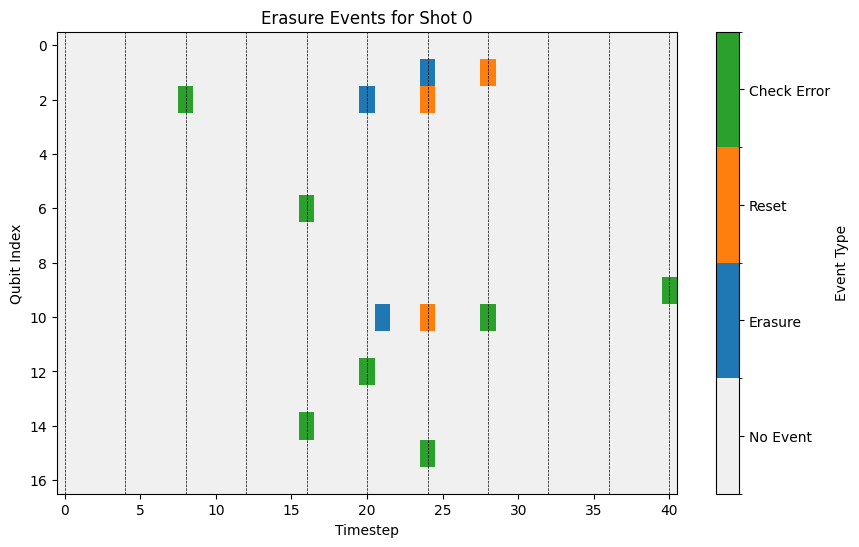

In [8]:
visualize_erasures(result, sim_params)